In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
imgset = "./Meat Freshness.v1-new-dataset.multiclass"
import tensorflow as tf

2022-11-03 23:03:09.165746: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-03 23:03:09.234287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 23:03:09.234320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**CREATE SUBDIRECTORIES WITH CLASS NAMES**

In [ ]:
os.listdir(imgset+"/train")

['HALF-FRESH-349-_JPG.rf.49ed52af6ef9bd9194bcb760db39fc85.jpg',
 'FRESH-967-_JPG.rf.e3db000d258bf85844e04ef6c063c8c7.jpg',
 'FRESH-372-_JPG.rf.67fc132b63b038b64b444d029e4b26bb.jpg',
 'SPOILED-712-_JPG.rf.199475822b2b726e37792e094b26380a.jpg',
 'SPOILED-113-_JPG.rf.15fbe70470c30e42116f36674649bd9b.jpg',
 'SPOILED-407-_JPG.rf.6689c3e0f9c8c27f3ab75b46011c478d.jpg',
 'HALF-FRESH-985-_JPG.rf.18aa22931ca4438ebae9a0c56cf7d871.jpg',
 'FRESH-835-_JPG.rf.fcf362272c36b81396cdc92655264600.jpg',
 'FRESH-361-_JPG.rf.2d452141b4a57788355a9439310266de.jpg',
 'SPOILED-416-_JPG.rf.95a050c40a540078bae2176bef395456.jpg',
 'SPOILED-365-_JPG.rf.6238e6b3aefafb3cb852323023e50e62.jpg',
 'SPOILED-355-_JPG.rf.5b60698c02be4eff5bc7257c7a3d6298.jpg',
 'FRESH-633-_JPG.rf.3b587b7f05f144ddac0f249a1baf5e2d.jpg',
 'HALF-FRESH-21-_JPG.rf.c541517919202b8398a365b095a4c3a6.jpg',
 'HALF-FRESH-330-_JPG.rf.ff5f492916e969721f626a97d5bd0958.jpg',
 'FRESH-609-_JPG.rf.ed8b4fde01900edacf097ab63d3d3c05.jpg',
 'SPOILED-121-_JPG.rf.02b

**DISTRIBUTE IMAGES TO FOLDERS ACCORDING TO THEIR CLASSES.**

In [ ]:
print("Training : \n")
print(len(os.listdir(imgset+"/train/FRESH")))
print(len(os.listdir(imgset+"/train/HALF-FRESH")))
print(len(os.listdir(imgset+"/train/SPOILED")))
print("Validation : \n")
print(len(os.listdir(imgset+"/val/FRESH")))
print(len(os.listdir(imgset+"/val/HALF-FRESH")))
print(len(os.listdir(imgset+"/val/SPOILED")))

Training : 

136
147
102
Validation : 

178
159
114


**PRE PROCESSING OF IMAGES**

In [ ]:
"""All images will be scaled to 1./255 to obtain 0-1 normalized image.Also image augmentation is used."""
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range = 40,
                                                                 width_shift_range = 0.2,height_shift_range = 0.2,
                                                                 shear_range = 0.2,zoom_range = 0.2,
                                                                 horizontal_flip = True,vertical_flip = True,
                                                                 fill_mode = "nearest",)
"""Validation images also will be scale dto 1./255 to obtain 0-1 normalized image,but image augmentation is NOT USED."""
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(os.path.join(imgset,"train"),target_size = (150,150),
                                                   class_mode = "categorical",batch_size = 32,seed = 42)
validation_generator = validation_datagen.flow_from_directory(os.path.join(imgset,"val"),target_size = (150,150),
                                                    class_mode = "categorical",batch_size = 32,seed = 42,shuffle = False)

Found 385 images belonging to 3 classes.
Found 451 images belonging to 3 classes.


**TRANSFER LEARNING MODEL**

**(1)Use Xception as base model.**

In [ ]:
from tensorflow.keras.applications.xception import Xception
base_model = Xception(input_shape = (150,150,3),weights = "imagenet",include_top = False,pooling = "max")
"""Freeze layers to stop updating weights of base model."""
for layer in base_model.layers:
    layer.trainable = False

2022-11-03 23:04:57.913623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-03 23:04:57.913662: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-03 23:04:57.913688: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2022-11-03 23:04:57.914191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


83683744/83683744 [==============================] - 65s 1us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

**(2)Create an architecture to feed models.**

In [ ]:
"""Here,we can assign last layer as add_11.It means that we can start to update weights after this layer"""
last_layer = base_model.get_layer("add_11")
print(last_layer.output_shape)

(None, 5, 5, 1024)


In [ ]:
"""GlobalAveragePooling layer to reduce input dim to 1D."""
x = tf.keras.layers.BatchNormalization()(last_layer.output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
"""Fully connected layer."""
x = tf.keras.layers.Dense(128,activation = "relu")(x)
"""Add dropout layer."""
x = tf.keras.layers.Dropout(0.3)(x)
"""Output layer"""
x = tf.keras.layers.Dense(3,activation = "softmax")(x)
"""Here,we can connect model end to end."""
model = tf.keras.models.Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

**CNN ARCHITECTURE**

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

**COMPILE AND FIT**

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate =0.0001),loss = "categorical_crossentropy",metrics = ["acc"])
"""Callback"""
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if epoch >= 10 and logs.get("acc") - logs.get("val_acc") >= 0.1:
            print("Model tends to be overfitting.Stop it.")
            self.model.stop_training = True
        elif logs.get("acc") > 0.9:
            print("Model tends to be overfitting.Stop it.")
            self.model.stop_training = True
callback = myCallback()

In [ ]:
history = model.fit(train_generator,epochs = 50,batch_size = 32,validation_data = validation_generator,
                   callbacks = [callback,],verbose = 1)

Epoch 1/50
13/13 [==============================] - 38s 3s/step - loss: 1.2030 - acc: 0.3532 - val_loss: 1.2195 - val_acc: 0.4035
Epoch 2/50
13/13 [==============================] - 35s 3s/step - loss: 1.0298 - acc: 0.5117 - val_loss: 0.9445 - val_acc: 0.5543
Epoch 3/50
13/13 [==============================] - 35s 3s/step - loss: 0.8704 - acc: 0.5974 - val_loss: 0.7908 - val_acc: 0.6718
Epoch 4/50
13/13 [==============================] - 34s 3s/step - loss: 0.8675 - acc: 0.5844 - val_loss: 0.6929 - val_acc: 0.7384
Epoch 5/50
13/13 [==============================] - 34s 3s/step - loss: 0.7934 - acc: 0.6416 - val_loss: 0.6353 - val_acc: 0.7827
Epoch 6/50
13/13 [==============================] - 35s 3s/step - loss: 0.7260 - acc: 0.6961 - val_loss: 0.5882 - val_acc: 0.7894
Epoch 7/50
13/13 [==============================] - 35s 3s/step - loss: 0.7321 - acc: 0.6494 - val_loss: 0.5538 - val_acc: 0.8160
Epoch 8/50
13/13 [==============================] - 35s 3s/step - loss: 0.6519 - acc: 0.73

**PLOT RESULTS**

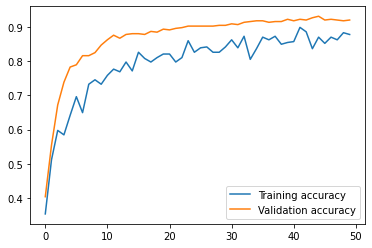

In [ ]:
import matplotlib.pyplot as plt
"""Accuracies."""
acc = history.history["acc"]
val_acc = history.history["val_acc"]
epochs = range(50)
plt.plot(epochs,acc,label = "Training accuracy")
plt.plot(epochs,val_acc,label = "Validation accuracy")
plt.legend()
plt.show()

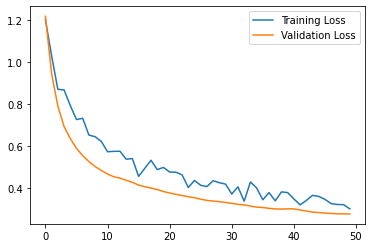

In [ ]:
"""Losses."""
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs,loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.legend()
plt.show()

**SAVE MODEL AND LOAD MODEL**

In [ ]:
model.save("meat_classify.h5")

In [ ]:
model1 = tf.keras.models.load_model("meat_classify.h5")

**GET THE IMAGES FROM INTERNET AND PROCESS THEM**

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [ ]:
def get_and_process(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img1 = img
    """Resize img to proper for feed model."""
    img = img.resize((150,150))
    """Convert img to numpy array,rescale it,expand dims and check vertically."""
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x,axis = 0)
    img_tensor = np.vstack([x])
    return img1,img_tensor

**FINAL : PREDICT IMAGE**

1/1 [==============================] - 0s 453ms/step
Prediction is : SPOILED


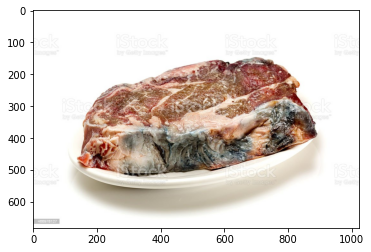

['FRESH', 'HALF-FRESH', 'SPOILED']
[[0.0110789  0.23066996 0.75825113]]


In [ ]:
import matplotlib.pyplot as plt
url = "https://media.istockphoto.com/photos/spoiled-steak-picture-id466978127"
img1,test_img = get_and_process(url)
"""Predict."""
pred = model1.predict(test_img)
classes = list(train_generator.class_indices.keys())
print(f"Prediction is : {classes[np.argmax(pred)]}")
plt.imshow(img1)
plt.show()

print(classes)
print(pred)